In [ ]:
# ===================================================================================== 2.1 ==================================================================================================

from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image as im

mnist = fetch_openml('mnist_784')

Original_file=pd.DataFrame(mnist.data)
print("Shape of Original DataSet (As imported) is : ",Original_file.shape)

excess_data, data_final = train_test_split(Original_file, test_size=0.07142857142)

print("Data to Be Used has shape : ",data_final.shape)

matrix=np.array(data_final)    # Getting our DataFrame in np.array form for easier calculations
matrix_mean = np.mean(matrix, 0)

# Covariance Matrix Calculation

matrixShifted = matrix - np.mean(matrix, 0)                                 # Shifting the cetre to Mean Point of N-Dimensional Point Cloud
covMatrix = 1 / matrix.shape[0] * np.matmul(matrix.T, matrixShifted)        # Using in-built functions to calculate Covariance Matrix

Shape of Original DataSet (As imported) is :  (70000, 784)
Data to Be Used has shape :  (5000, 784)


In [ ]:
# ===================================================================================== 2.2 ==================================================================================================

def pca(matrix):

  eigenValues, eigenVectors = np.linalg.eigh(covMatrix)                       # Finding Eigenvalues and Eigenvectors using in-built function


  # Sorting the EigenVectors on basis of descending EigenValues
  sortedIndices = np.argsort(eigenValues)[::-1]
  sortedEigenvectors = eigenVectors[:,sortedIndices]
  sortedEigenvalues = eigenValues[sortedIndices]
  

  # After multiplication of original matrix and all Eigenvectors we get reducedMatrix
  reducedMatrix=np.matmul(matrix, sortedEigenvectors)                


  return reducedMatrix, sortedEigenvectors, sortedEigenvalues




reducedMatrix, sortedEigenvectors, sortedEigenvalues = pca(matrix)            # Stored the values as required by us in variables of related names

# Now printing the Top 5 EigenVectors

for i in range(5):
  print(i+1,'Eigen Value : ',sortedEigenvalues[i])



1 Eigen Value :  334617.14418820647
2 Eigen Value :  247019.61348907658
3 Eigen Value :  208067.5480948557
4 Eigen Value :  185697.7518730695
5 Eigen Value :  163943.7603629965


(i) ---->  For K=10


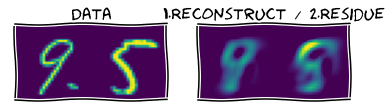

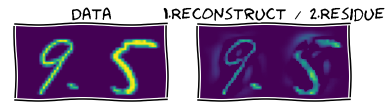


(ii) ---->  For K=50


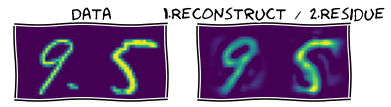

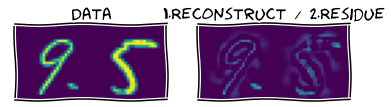


(iii) ---->  For K=100


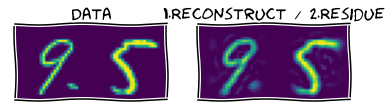

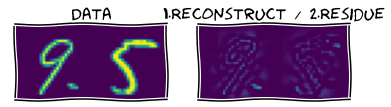


(iv) ---->  For K=300


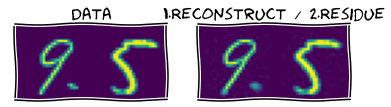

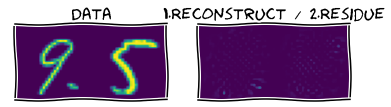


(v) ---->  For K=700


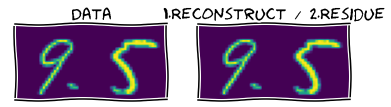

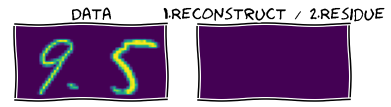


(vi) ---->  For K=784


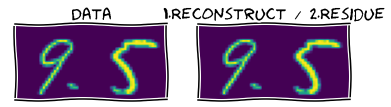

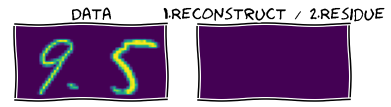

In [ ]:
# ===================================================================================== 2.3,2.4,2.5 ==============================================================================================

def reconstruct(reducedMatrix, sortedEigenvectors, K):                           # Reconstruct the data from the  and eigenvectors
  
  matrixReconstructed =  np.matmul(reducedMatrix[:, :K], sortedEigenvectors[:, :K].T) #+ matrix_mean
  matrixResidual=matrix-matrixReconstructed
  return matrixReconstructed,matrixResidual


def plot_comparision(matrix1,matrix2):

  plt.figure()

  ax = plt.subplot(121)
  k = 0
  for k1 in range(2):
    for k2 in range(1):
      k = k + 1
      plt.imshow(np.reshape(matrix1[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((2 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Data')
  

  ax = plt.subplot(122)
  k = 0
  for k1 in range(2):
    for k2 in range(1):
      k = k + 1
      plt.imshow(np.reshape(np.real(matrix2[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((2 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('1.Reconstruct / 2.Residue')
  plt.show()


# (i) ---->  For K=10
print('(i) ---->  For K=10')
K = 10
matrix_reconstructed10,matrix_residual10 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed10)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual10)

# (ii) ---->  For K=50
print('\n(ii) ---->  For K=50')
K = 50
matrix_reconstructed50,matrix_residual50 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed50)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual50)

# (iii) ---->  For K=100
print('\n(iii) ---->  For K=100')
K = 100
matrix_reconstructed100,matrix_residual100 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed100)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual100)

# (iv) ---->  For K=300
print('\n(iv) ---->  For K=300')
K = 300
matrix_reconstructed300,matrix_residual300 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed300)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual300)

# (v) ---->  For K=700
print('\n(v) ---->  For K=700')
K = 700
matrix_reconstructed700,matrix_residual700 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed700)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual700)

# (vi) ----> For K=784
print('\n(vi) ---->  For K=784')
K = 784
matrix_reconstructed784,matrix_residual784 = reconstruct(reducedMatrix, sortedEigenvectors, K)
with plt.xkcd():
  plot_comparision(matrix, matrix_reconstructed784)
with plt.xkcd():
  plot_comparision(matrix, matrix_residual784)


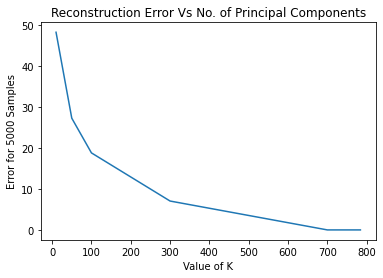

In [ ]:
# ===================================================================================== 2.6 ==================================================================================================

k_list=[10,50,100,300,700,784]
error_list=[]

for i in k_list:
  matrix_reconstructed,matrix_residual = reconstruct(reducedMatrix, sortedEigenvectors, i)
  sum1=0
  for k in range(5000):
    sum2=0
    for n,m in zip(matrix[k],matrix_reconstructed[k]):
      sum2+=(n-m)**2
    sum1+=np.sqrt(sum2/784)
  error_list.append(sum1/5000)



plt.plot(k_list,error_list)
plt.xlabel('Value of K')
plt.ylabel('Error for 5000 Samples')
plt.title('Reconstruction Error Vs No. of Principal Components')
plt.show()